Just a file to try out a few things and to create some of the needed plots

In [1]:
import pandas as pd  # Import needed modules
import numpy as np
from scipy.signal import find_peaks, argrelextrema

data = pd.read_csv("data_bll.csv", sep=";")  # Load the sensor data and process it for usability
data["time"] = pd.to_datetime(data["time"], format="%d.%m.%Y-%H:%M:%S")  # Make time to type time
keys = list(data.keys())  # Remove missing data rows
keys.remove("time")
for key in keys:
    data[key] = pd.to_numeric(data[key], errors="coerce")
data = data.dropna()
data = data.reset_index(drop=True)  # regenerate indices after deleting rows
vent = pd.read_csv("vent.csv", sep=";")
vent["time"] = pd.to_datetime(vent["time"], format="%Y-%m-%d %H:%M:%S")  # Make time to type time

dush = pd.read_csv("dush.csv", sep=";")
dush["time"] = pd.to_datetime(dush["time"], format="%Y-%m-%d %H:%M:%S")  # Make time to type time


In [2]:
vent["time"].max() # An little overview

Timestamp('2022-02-07 08:45:00')

In [3]:
data.describe()  # statistically relevant values

,Unnamed: 0,temperature_bathroom_middle,humidity_bathroom_middle,temperature_bathoroom_upstairs,humidity_bathroom_upstairs,temperature_outside,humidity_outside
count,12523.000000,12523.00000,12523.000000,12523.000000,12523.000000,12523.000000,12523.000000
mean,11578.723868,18.42592,61.085283,21.519412,54.152919,6.004552,85.257606
std,6509.083227,2.55094,10.114387,1.489334,11.334534,3.532887,10.699609
min,0.000000,8.00000,25.000000,16.700000,30.000000,-2.000000,29.000000
25%,7577.500000,17.10000,54.000000,21.000000,46.000000,4.000000,74.000000
50%,10800.000000,18.80000,60.000000,21.700000,52.000000,6.000000,89.000000
75%,13931.500000,20.30000,68.000000,22.300000,59.000000,8.000000,95.000000
max,38563.000000,23.10000,97.000000,27.100000,91.000000,15.000000,99.000000


In [4]:
diff_from_avg=data.temperature_bathroom_middle - data.temperature_bathroom_middle.mean()
data = data.assign(temp_diff_mean=diff_from_avg)

diff_from_avg=data.humidity_bathroom_middle - data.temperature_bathroom_middle.mean()
data = data.assign(humi_diff_mean=diff_from_avg)

<AxesSubplot:xlabel='time'>

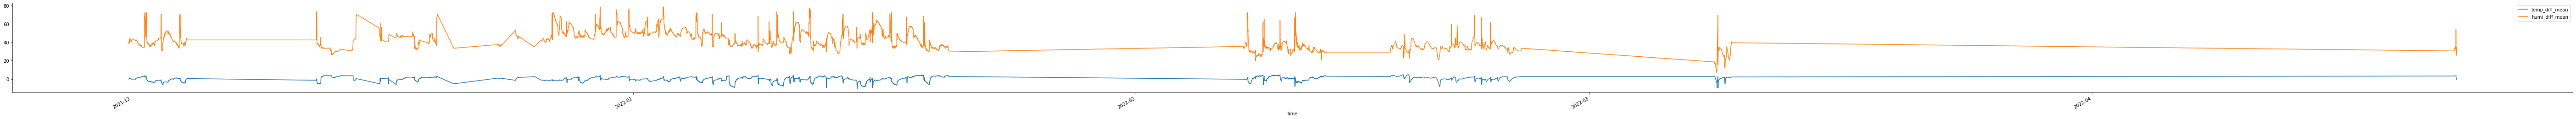

In [5]:
data[["time", "temp_diff_mean", "humi_diff_mean"]].plot(x="time", figsize=(100,4))# Plotting the data

In [6]:
data["derivation_humidity_mid"] = np.gradient(data["humidity_bathroom_middle"], 5)

<AxesSubplot:xlabel='time'>

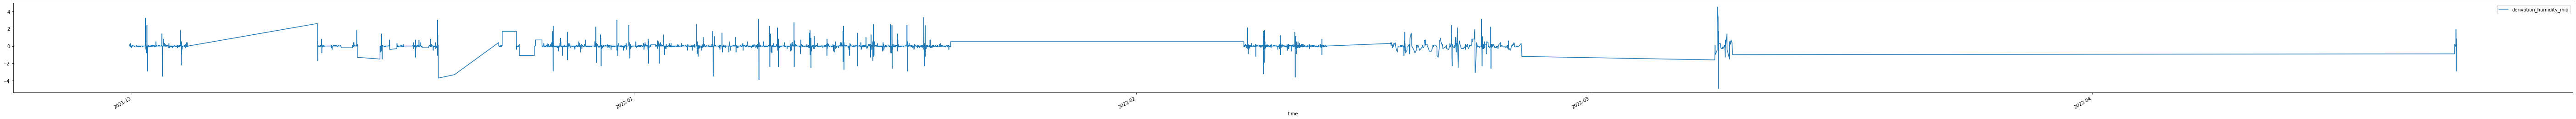

In [7]:
data[["derivation_humidity_mid", "time"]].plot(x="time", figsize=(100,4))

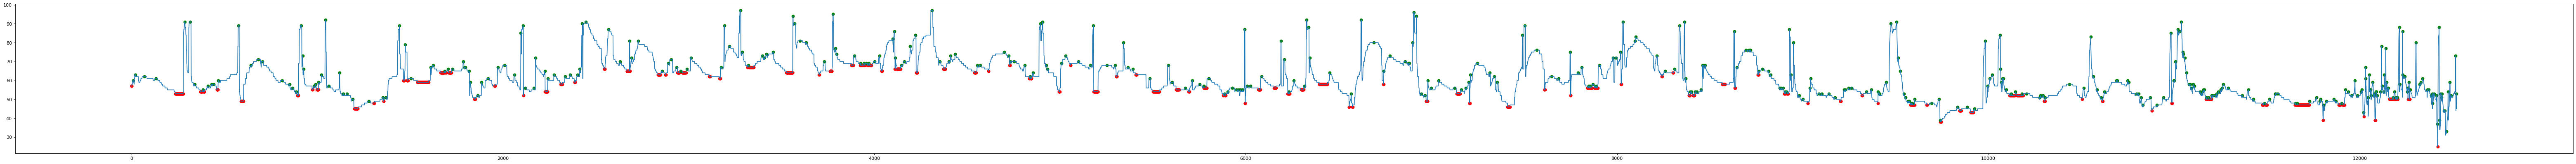

In [8]:
# Here i try to look wheter one can see the dush events purely from the sensor data

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(100, 6), dpi=80)

n = 50  # number of points to be checked before and after

# Find local peaks
data['min'] = data.iloc[argrelextrema(data.humidity_bathroom_middle.values, np.less_equal, order = n)[0]]['humidity_bathroom_middle']
data['max'] = data.iloc[find_peaks(data['humidity_bathroom_middle'])[0]]['humidity_bathroom_middle']

# Plot results

plt.scatter(data.index, data['min'], c='r')
plt.scatter(data.index, data['max'], c='g')
plt.plot(data.index, data['humidity_bathroom_middle'])

/home/jonathan/Programme/miniconda3/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<AxesSubplot:xlabel='humidity_bathroom_middle', ylabel='humidity_outside'>

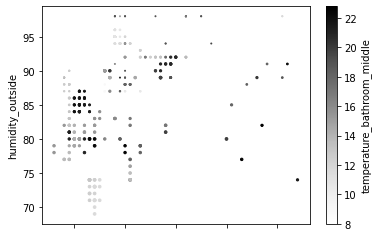

In [9]:
# No overall correlation to the weather outside (not surprising since the bath is being heated)
vent[["temperature_bathroom_middle", "humidity_bathroom_middle", "temperature_outside", "humidity_outside"]].plot.scatter(x="humidity_bathroom_middle", y="humidity_outside", c="temperature_bathroom_middle", s="temperature_outside")

<AxesSubplot:xlabel='temperature_bathroom_middle', ylabel='temperature_outside'>

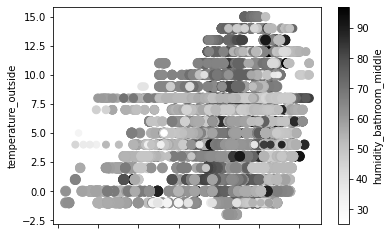

In [10]:
data[["temperature_bathroom_middle", "humidity_bathroom_middle", "temperature_outside", "humidity_outside"]].plot.scatter(c="humidity_bathroom_middle", s="humidity_outside", x="temperature_bathroom_middle", y="temperature_outside")

<AxesSubplot:xlabel='temperature_outside', ylabel='humidity_bathroom_middle'>

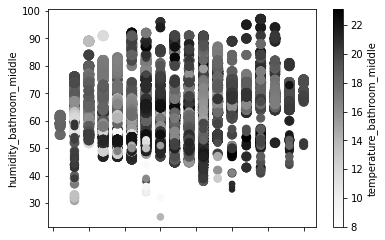

In [11]:
data[["temperature_bathroom_middle", "humidity_bathroom_middle", "temperature_outside", "humidity_outside"]].plot.scatter(y="humidity_bathroom_middle", s="humidity_outside", c="temperature_bathroom_middle", x="temperature_outside")

<AxesSubplot:xlabel='humidity_outside', ylabel='humidity_bathroom_middle'>

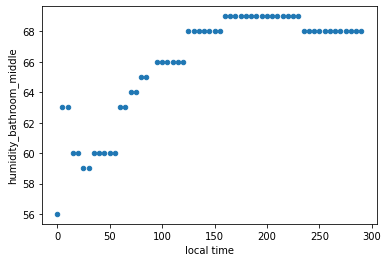

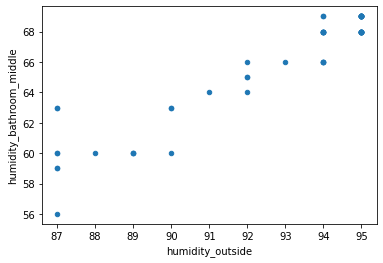

In [12]:
vent[vent["Id"]==10].plot.scatter(y="humidity_bathroom_middle", x="local time")#, c="Id", colormap="viridis")

vent[vent["Id"]==10].plot.scatter(y="humidity_bathroom_middle", x="humidity_outside")#, c="Id", colormap="viridis")

<AxesSubplot:xlabel='local time', ylabel='humidity_bathroom_middle'>

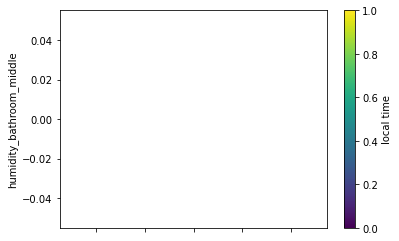

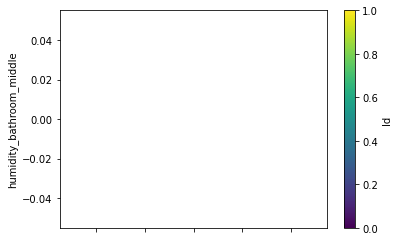

In [13]:
open2 = vent[vent["Config"] == "2"]
open2.plot.scatter(y="humidity_bathroom_middle", x="humidity_outside", c="local time", colormap="viridis")
open2.plot.scatter(y="humidity_bathroom_middle", x="local time", c="Id", colormap="viridis")

<AxesSubplot:title={'center':'1x offen'}, xlabel='local time', ylabel='humidity_bathroom_middle'>

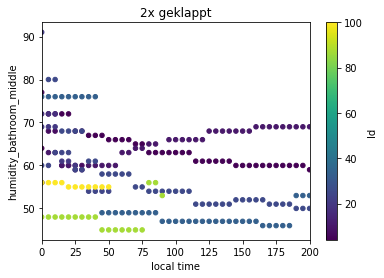

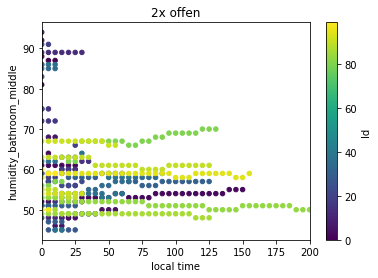

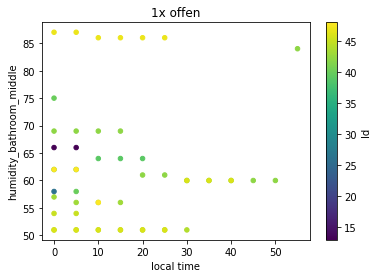

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
vent[vent["Config"]==4].plot.scatter(y = "humidity_bathroom_middle", x="local time", c="Id", colormap="viridis", xlim=(0,200), ax = ax, title="2x geklappt")
fig, ax = plt.subplots()
vent[vent["Config"]==2].plot.scatter(y = "humidity_bathroom_middle", x="local time", c="Id", colormap="viridis", xlim=(0,200), ax = ax, title="2x offen")
fig, ax = plt.subplots()
vent[vent["Config"]==1].plot.scatter(y = "humidity_bathroom_middle", x="local time", c="Id", colormap="viridis", ax = ax, title="1x offen")
#fig, ax = plt.subplots()
#vent[vent["Config"]==3].plot.scatter(y = "humidity_bathroom_middle", x="local time", c="Id", colormap="viridis", ax = ax, title="1x geklappt")

<AxesSubplot:xlabel='humidity_outside', ylabel='local time'>

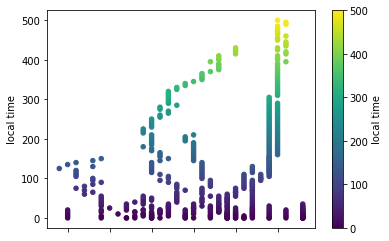

In [15]:
vent[["humidity_outside", "humidity_bathroom_middle", "local time"]].plot.scatter(x = "humidity_outside", y="local time", c="local time", colormap="viridis")

<AxesSubplot:xlabel='time'>

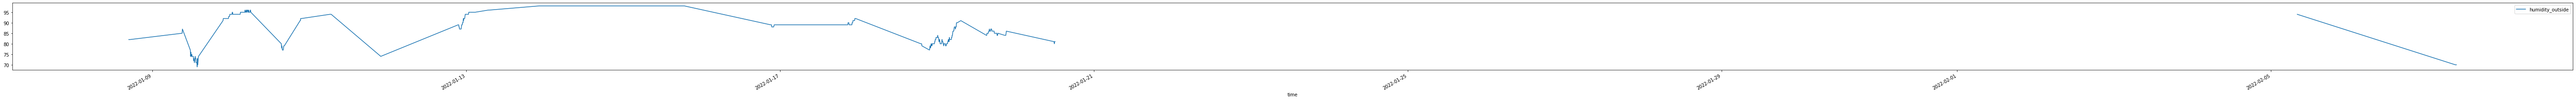

In [16]:
vent[["time", "humidity_outside"]].plot(x="time", figsize=(100,3))

In [17]:
vent.corr("spearman") #humidity-in-out # time-humidity

,temperature_bathroom_middle,humidity_bathroom_middle,temperature_bathoroom_upstairs,humidity_bathroom_upstairs,temperature_outside,humidity_outside,Id,Config,local time,absolute,absolute_outside
temperature_bathroom_middle,1.000000,0.094416,0.462015,0.151403,0.114741,-0.170033,0.545311,-0.355213,-0.403395,0.898349,-0.104306
humidity_bathroom_middle,0.094416,1.000000,0.013377,-0.443783,-0.417177,0.567092,-0.202912,-0.038896,-0.205426,0.515203,-0.365186
temperature_bathoroom_upstairs,0.462015,0.013377,1.000000,0.173524,-0.112517,-0.142994,0.172497,-0.145069,-0.161057,0.285205,-0.352528
humidity_bathroom_upstairs,0.151403,-0.443783,0.173524,1.000000,0.607136,-0.524497,0.211647,0.110706,0.162657,0.006755,0.559316
temperature_outside,0.114741,-0.417177,-0.112517,0.607136,1.000000,-0.855930,0.217286,-0.330392,-0.223866,-0.203438,0.924926
humidity_outside,-0.170033,0.567092,-0.142994,-0.524497,-0.855930,1.000000,-0.238532,0.201174,0.163611,0.172277,-0.651049
Id,0.545311,-0.202912,0.172497,0.211647,0.217286,-0.238532,1.000000,-0.439252,-0.251795,0.138690,-0.011965
Config,-0.355213,-0.038896,-0.145069,0.110706,-0.330392,0.201174,-0.439252,1.000000,0.578419,-0.103230,-0.224814
local time,-0.403395,-0.205426,-0.161057,0.162657,-0.223866,0.163611,-0.251795,0.578419,1.000000,-0.462730,-0.201278
absolute,0.898349,0.515203,0.285205,0.006755,-0.203438,0.172277,0.138690,-0.103230,-0.462730,1.000000,-0.117368


<AxesSubplot:xlabel='local time'>

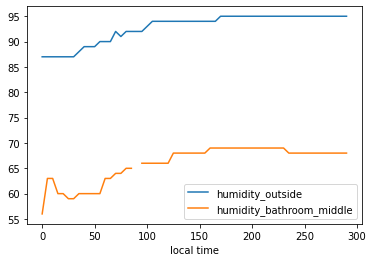

In [18]:
vent[vent["Id"]==10][["humidity_outside", "humidity_bathroom_middle", "local time"]].plot(x="local time")#, c="Id", colormap="viridis")

In [19]:
vent.corr(method="spearman")

,temperature_bathroom_middle,humidity_bathroom_middle,temperature_bathoroom_upstairs,humidity_bathroom_upstairs,temperature_outside,humidity_outside,Id,Config,local time,absolute,absolute_outside
temperature_bathroom_middle,1.000000,0.094416,0.462015,0.151403,0.114741,-0.170033,0.545311,-0.355213,-0.403395,0.898349,-0.104306
humidity_bathroom_middle,0.094416,1.000000,0.013377,-0.443783,-0.417177,0.567092,-0.202912,-0.038896,-0.205426,0.515203,-0.365186
temperature_bathoroom_upstairs,0.462015,0.013377,1.000000,0.173524,-0.112517,-0.142994,0.172497,-0.145069,-0.161057,0.285205,-0.352528
humidity_bathroom_upstairs,0.151403,-0.443783,0.173524,1.000000,0.607136,-0.524497,0.211647,0.110706,0.162657,0.006755,0.559316
temperature_outside,0.114741,-0.417177,-0.112517,0.607136,1.000000,-0.855930,0.217286,-0.330392,-0.223866,-0.203438,0.924926
humidity_outside,-0.170033,0.567092,-0.142994,-0.524497,-0.855930,1.000000,-0.238532,0.201174,0.163611,0.172277,-0.651049
Id,0.545311,-0.202912,0.172497,0.211647,0.217286,-0.238532,1.000000,-0.439252,-0.251795,0.138690,-0.011965
Config,-0.355213,-0.038896,-0.145069,0.110706,-0.330392,0.201174,-0.439252,1.000000,0.578419,-0.103230,-0.224814
local time,-0.403395,-0.205426,-0.161057,0.162657,-0.223866,0.163611,-0.251795,0.578419,1.000000,-0.462730,-0.201278
absolute,0.898349,0.515203,0.285205,0.006755,-0.203438,0.172277,0.138690,-0.103230,-0.462730,1.000000,-0.117368


<AxesSubplot:>

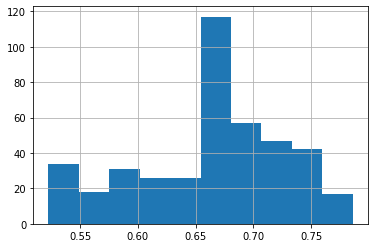

In [20]:
vent["absolute_outside"].hist()

<AxesSubplot:>

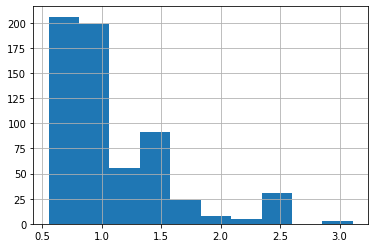

In [21]:
vent["absolute"].hist()

In [22]:
vent[(vent["Config"]==2) & (vent["absolute_outside"] > 0.65) & (vent["absolute_outside"] < 0.7)]

,time,temperature_bathroom_middle,humidity_bathroom_middle,temperature_bathoroom_upstairs,humidity_bathroom_upstairs,temperature_outside,humidity_outside,Id,Config,local time,room,absolute,absolute_outside
56,2022-01-08 16:50:00,22.8,87.0,22.0,50.0,4.0,82.0,0,2,5.0,mid,2.457673,0.667472
57,2022-01-08 16:55:00,22.8,87.0,22.0,50.0,4.0,82.0,0,2,10.0,mid,2.457673,0.667472
58,2022-01-08 17:00:00,15.3,48.0,22.0,50.0,4.0,82.0,0,2,15.0,mid,0.841621,0.667472
59,2022-01-08 17:05:00,15.3,48.0,22.0,50.0,4.0,82.0,0,2,20.0,mid,0.841621,0.667472
60,2022-01-08 17:10:00,12.9,52.0,22.0,50.0,4.0,82.0,0,2,25.0,mid,0.778578,0.667472
61,2022-01-08 17:15:00,12.9,52.0,21.9,50.0,4.0,82.0,0,2,30.0,mid,0.778578,0.667472
89,2022-01-09 13:45:00,11.7,54.0,21.8,56.0,7.0,69.0,2,2,125.0,mid,0.746398,0.692733
95,2022-01-09 21:40:00,18.3,88.0,19.2,62.0,3.0,91.0,3,2,0.0,mid,1.872793,0.690009
96,2022-01-09 21:45:00,16.9,64.0,19.2,62.0,3.0,92.0,3,2,5.0,mid,1.244922,0.697591
210,2022-01-10 21:15:00,22.5,92.0,20.6,47.0,3.0,91.0,6,2,0.0,mid,2.550994,0.690009


In [23]:
subset = vent[(vent["Id"] == 0) | (vent["Id"] == 2) | (vent["Id"] == 3) | (vent["Id"] == 6)][["local time", "absolute", "absolute_outside"]]

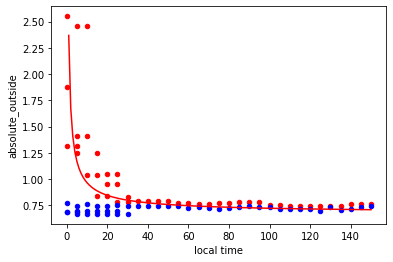

In [24]:
import matplotlib.pyplot as plt
import numpy as np
ax1 = subset.plot(kind='scatter', x='local time', y='absolute', color='r')
subset.plot(kind='scatter', x='local time', y='absolute_outside', color='b', ax=ax1)   



# 100 linearly spaced numbers
x = np.linspace(1,150,150)

# the function, which is y = x^2 here
y = 1.7*1/(x**0.76+0.001) +0.67

# setting the axes at the centre
# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()


$\partial$

In [25]:
np.unique(vent[(vent["absolute_outside"] > 0.65) & (vent["absolute_outside"] < 0.7)&(vent["absolute"] < 8)&(vent["absolute"] > 0)]["Id"])

array([ 0,  2,  3,  4,  6, 20, 21, 25, 42, 44])

In [26]:
subset = vent[(vent["Id"] == 0) | (vent["Id"] == 4) | (vent["Id"] == 25)][["local time", "absolute", "Config", "absolute_outside"]]

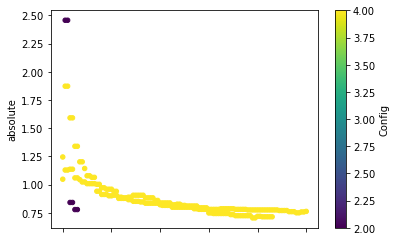

In [27]:
ax1 = subset.plot(kind='scatter', x='local time', y='absolute', c="Config", colormap="viridis")


In [28]:
 def f(c, 𝛼, L_in0, L_out0, t):
    return (L_in0-L_out0)*(c/(t+c))**𝛼 + L_out0

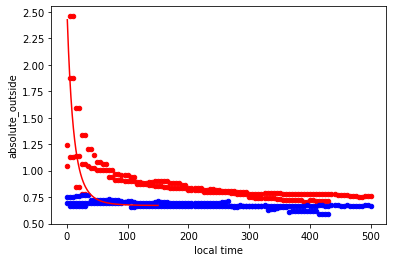

In [29]:
import matplotlib.pyplot as plt
import numpy as np
ax1 = subset.plot(kind='scatter', x='local time', y='absolute', color='r')
subset.plot(kind='scatter', x='local time', y='absolute_outside', color='b', ax=ax1)   



# 100 linearly spaced numbers
x = np.linspace(1,150,150)

# the function, which is y = x^2 here
y = f(60.17071922,  5.79129464, 2.6, 0.67, x)

# setting the axes at the centre
# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()
